Decision Tree Accuracy: 0.9473684210526315
Confusion Matrix:
 [[40  3]
 [ 3 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



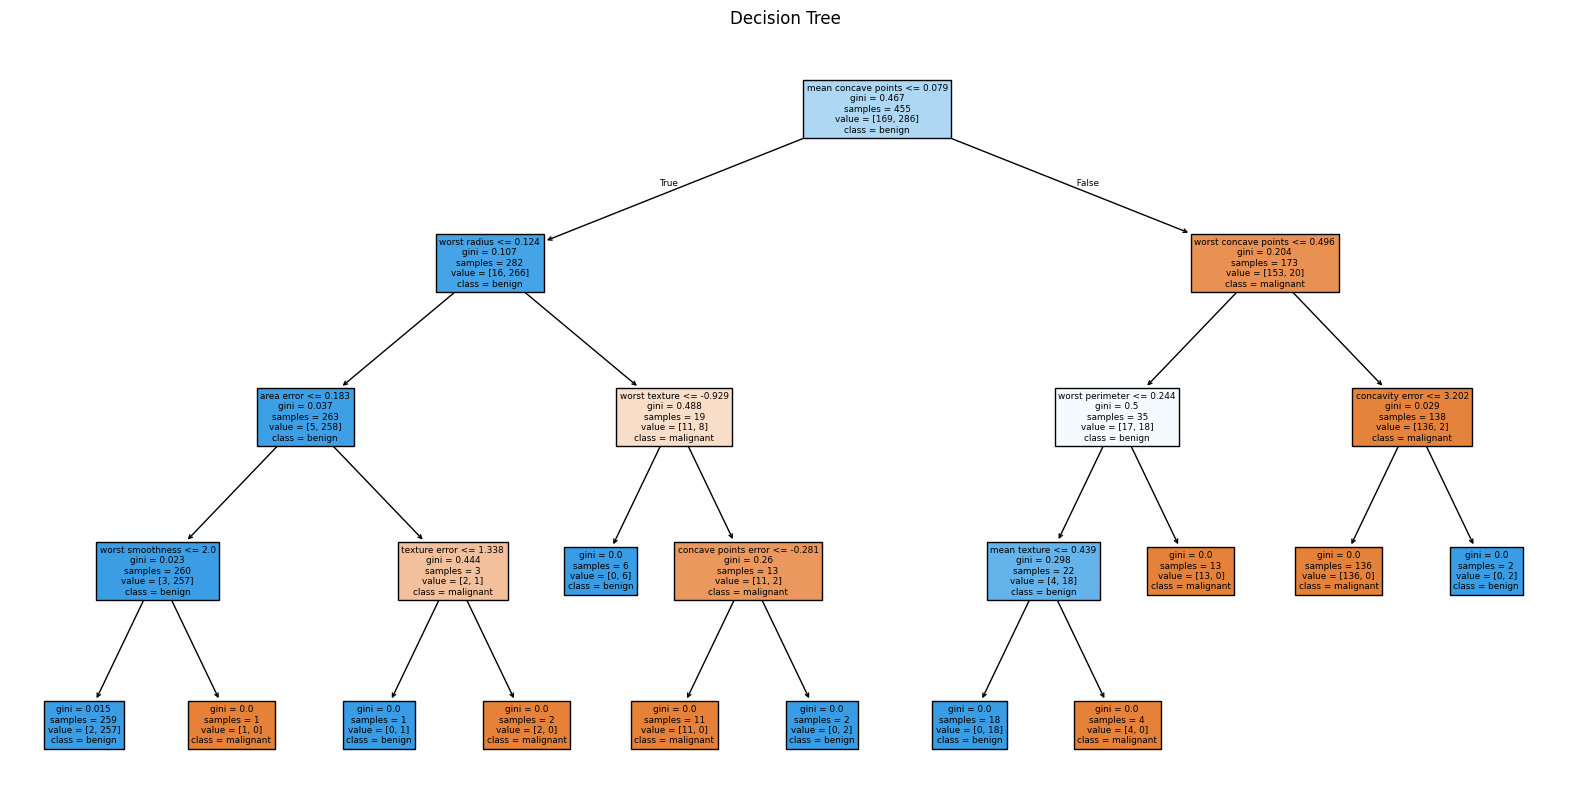

Random Forest Accuracy: 0.9649122807017544
Confusion Matrix:
 [[40  3]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



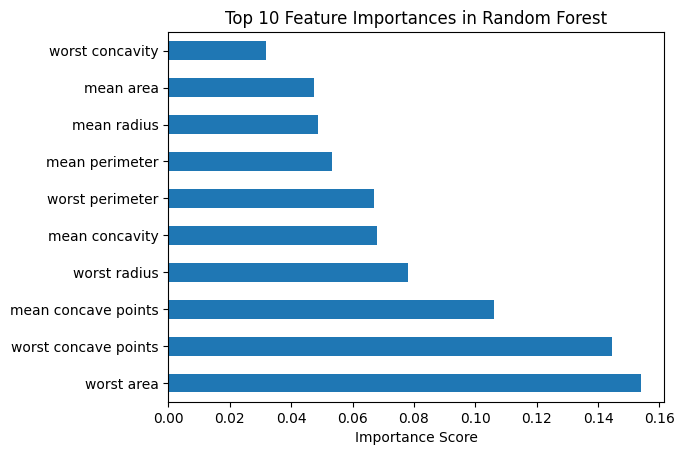

Cross-Validation Accuracy: 95.61%


In [1]:
# Task 5: Decision Trees and Random Forests
# Dataset: Breast Cancer (can replace with Heart Disease dataset if needed)

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Classifier
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train_scaled, y_train)
y_pred_tree = dtree.predict(X_test_scaled)

# Evaluation - Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

# Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Decision Tree")
plt.show()

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluation - Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Feature Importances
importances = pd.Series(rf.feature_importances_, index=data.feature_names)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances in Random Forest")
plt.xlabel("Importance Score")
plt.show()

# Cross-validation score
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Accuracy: {:.2f}%".format(cv_scores.mean() * 100))
